In [12]:
import pandas as pd
import seaborn as sns
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.special import factorial



data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/DL_data.csv")

1. (1 pt) Cuál es la distribución del grado de los centro logísticos.

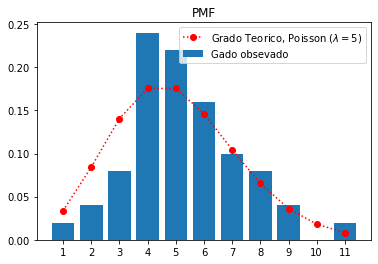

In [11]:
muestra = data['Enlaces']
l= 5
x, fx = np.unique(muestra, return_counts=True)
plt.bar(x, fx/fx.sum())

#Vamos a graficar la distribución teórica (curva PMF en rojo) 
#para los valores observados (barras azules) 
#en la muestra: entre min(x) y max(x)
x_t = np.arange(x.min(), x.max()+1)
plt.plot(x_t, poisson.pmf(x_t, l), ':or')
plt.title("PMF")
plt.xticks(x_t)
plt.legend(["Grado Teorico, Poisson ($\lambda=5$)", "Gado obsevado"], loc ="upper right")
t=plt.xticks(x_t)

2. (2 pt) Cuál es la probabilidad de que un centro cualquiera tenga 3 o menos conexiones.

$X$: cuenta el número de conexiones de un centro.
- Tenemos que $X\sim Poiss(\lambda=5)$ describe nuestra variable aleatoria.

- La probalidad de que un centro tenga 3 o menos conexiones, $P(X \leq 3)$, seria igual a $P( X =1 ) +P( X =2 )+P( X =3 )$. 

Deacuerdo con los valores obsevados tenemos que $P( X =1 )= 0.02, P( X =2 )=0.04 ,P( X =3 )= 0.24$, entonces la provabilidad segun los valores obsevados sera igual al 14%.

De acuerdo a la distribución de Poisson X-Poisson($\lambda=5$), tenemos que $P( X =1 )\approx 0.033, P( X =2 )\approx0.084,P( X =3 )\approx 0.140$, entonces la provabilidad segun los valores obsevados sera aproximadamente igual al 14%.

In [76]:
#solucion pregunta 2
muestra = data['Enlaces']
l= 5
x, fx = np.unique(muestra, return_counts=True)
p_obs= fx/sum(fx)
print( "Probalidad de que un centro tenga 3 o menos conexiones (segun valores observados es):  "+ str(sum(p_obs[:3])))
#valores segun la funcion de python
p_poiss=sum(poisson.pmf(x_t[:3] , l))
print( "Probalidad de que un centro tenga 3 o menos conexiones (segun valores observados es):  "+ str(p_poiss))



Probalidad de que un centro tenga 3 o menos conexiones (segun valores observados es):  0.14
Probalidad de que un centro tenga 3 o menos conexiones (segun valores observados es):  0.25828796829827616


3. (1 pt) Cuál es la probabilidad de que un nodo tenga entre 4 y 6 conexiones.

La probabilida de que un nodo tenga entre 4 y 6 conexiones es 
Usando la CDF de poison
$$p(4\leq X \leq 6) = p(X=4)+p(X= 5)+p(X=6)$$
Usando la implementación en Python de Poisson tenemos que la probabilidad es igual a un 50%.

In [82]:
#solucion pregunta 3
p_poiss=sum(poisson.pmf(x_t[3:6] , l))
print( "Probalidad de que un centro tenga entre 4 y 6 conexiones es :  "+ str(p_poiss))


Probalidad de que un centro tenga entre 4 y 6 conexiones es :  0.49715754767557674


4. (1 pt) Replique el histograma acumulado y la función de distribución acumulada para la distritución de Poisson:

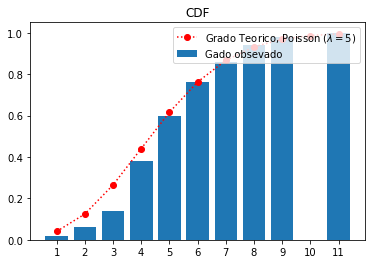

In [37]:
muestra = data['Enlaces']
l= 5
x, fx = np.unique(muestra, return_counts=True)
plt.bar(x, (fx/fx.sum()).cumsum())

#Vamos a graficar la distribución acumulada teórica (curva CDF en rojo) 
#para los valores observados (barras azules) 
#en la muestra: entre min(x) y max(x)
plt.plot(x_t, poisson.cdf(x_t, l), ':or')
plt.title("CDF")
plt.legend(["Grado Teorico, Poisson ($\lambda=5$)", "Gado obsevado"], loc ="upper right")
t=plt.xticks(x_t)

5. (2 pt) Responda usando la CDF:
- 1- Cuál es la probabilidad de que un centro cualquiera tenga 3 o menos conexiones.

 $X$: cuenta el número de conexiones de un centro.
- Tenemos que $X\sim Poiss(\lambda=5)$ describe nuestra variable aleatoria.

- Por lo tanto usando la CDF de poison tenemos que 
$$P(X \leq 3) = \sum_{x=1}^{3} \frac{e^{-\lambda} \lambda^x}{x!}.$$
- Remplazando $\lambda =5$, se concluye que la probalidad de que un centro tenga 3 o menos conexiones es 25.8%
$$\sum_{x=0}^{3} \frac{e^{-5} 5^x}{x!}  \approx 0.258$$





- 2.  Cuál es la probabilidad de que un nodo tenga entre 4 y 6 conexiones.
La probabilida de que un nodo tenga entre 4 y 6 conexiones es 50 %
Usando la CDF de poison
$$p(4\leq X \leq 6) = \sum_{x=4}^{6} \frac{e^{-\lambda} \lambda^x}{x!}$$
donde $\lambda= 5$, tenemos que 
$$\sum_{x=4}^{6} \frac{e^{- 5} 5^x}{x!}\approx 0.4971$$

In [137]:

#solucion pregunta 5.1
def poisson_pmf(x, l):
    x = np.array(x)
    return np.exp(-l)*l**(x) / factorial(x)
l = 5

x = np.arange(1)

print("Evaluando la PMF:", poisson_pmf(x, l).sum())

#solucion pregunta 5.2
x = np.arange(3)+4
print("Evaluando la PMF:", poisson_pmf(x, l).sum())


Evaluando la PMF: 0.006737946999085467
Evaluando la PMF: 0.497157547675577


6. (1 pt) Calcule el valor esperado y varianza de la distribución analítica, compare con la media y varianza muestral.

- El valor teorico de la media y la varianza es igual a $\lambda= 5$
- Por definicion el valor esperado de una variable aleatoria esta dado por
$$ E[X]= \sum_{x=1}^{11} x_i f(x_i) \approx 4.93 $$
- La varianza se define como
$$ E[(X-E[x])^2]= \sum_{x=1}^{11} (x_i - E[x])^2f(x_i)  $$
ya que $E[X]\approx 4.93$ concluimos que 
$$\sigma^2= 4.519$$

- La media y la varianza de la muestra es:
$$\mu = 5.2$$
$$\sigma^2 = 3.879 $$

- Los valores obtenidos de la media y la varianza  se aproxima a los valores analiticos, a pesar que la muestra es pequeña nos valores de la media si se aproxima al valor esperado (tanto teorico como analico). La varianza es un valor un poco ajeno  a 5. Sin embargo, considerando el tamaño de la muestra considero que es una buena aproximación.


In [157]:
# Valor esperado y varianza de la distribución analítica

x=np.array(range(11))+1
y=poisson.pmf(x, l)
ex=sum(x*y)
vari= sum((x-ex)**2 *y)
print("Valor esperado (analitico):", ex)
print("Varianza (analitico):", vari)
muestra = data['Enlaces']
l= 5
x, fx = np.unique(muestra, return_counts=True)

print("Media de la muestra:", muestra.mean())
print("Varianza de la muestra:", muestra.var())



Valor esperado (analitico): 4.931523657008082
Varianza (analitico): 4.5194114856420375
Media de la muestra: 5.28
Varianza de la muestra: 3.879183673469385


7. (2 pt) Discuta qué tan adecuada considera esta distribución para modelar nuestros datos observados.
- Considero que es una buena aproximacion para la muestra estudiada ya que graficamente al igual que los estimadores se aproximan mucho a los valores analicos. El valor de lambda obtenido de la teoria de grafos realmente modela los datos estudiados.